In [64]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem.porter import PorterStemmer
from nltk import tokenize
import nltk.data
import spacy
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt


pd.options.display.max_columns = 30
%matplotlib inline
#nltk.download('punkt')

In [34]:
nlp = spacy.load("en_core_web_sm")
def lemmatize(text):
    doc = nlp(text)
    # Turn it into tokens, ignoring the punctuation
    tokens = [token for token in doc if not token.is_punct]
    # Convert those tokens into lemmas, EXCEPT the pronouns, we'll keep those.
    lemmas = [token.lemma_ if token.pos_ != 'PRON' else token.orth_ for token in tokens]
    return lemmas

In [47]:
filepath = 'Telemachus.txt'
text = ''
with open(filepath, 'r') as f:
  text = f.read()
text = text.replace('â€', '')

#nltk.data.load('tokenizers/punkt/english.pickle')
tokenized_text = tokenize.sent_tokenize(text)

In [52]:
len(tokenized_text)

755

In [35]:
vectorizer = CountVectorizer(stop_words='english', tokenizer=lemmatize)
matrix = vectorizer.fit_transform(tokenized_text)
matrix

c:\Users\ivano\Work\Practice\Ulysses Analysis\venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\ivano\Work\Practice\Ulysses Analysis\venv\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


<755x1587 sparse matrix of type '<class 'numpy.int64'>'
	with 3765 stored elements in Compressed Sparse Row format>

In [36]:
frame = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())
frame

,\n,\n\n,,,'s,able,abroad,abruptly,absurd,accent,ad,add,ade,affirmation,afraid,...,world,worsting,wound,wretched,wrinkle,write,wrong,year,yellow,yes,young,zarathustra,zulus,zut,â€
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
751,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
752,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
753,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=lemmatize, use_idf=False, norm='l1')
matrix = tfidf_vectorizer.fit_transform(tokenized_text)
frame = pd.DataFrame(matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
frame

c:\Users\ivano\Work\Practice\Ulysses Analysis\venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\ivano\Work\Practice\Ulysses Analysis\venv\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


,\n,\n\n,,,'s,able,abroad,abruptly,absurd,accent,ad,add,ade,affirmation,afraid,...,world,worsting,wound,wretched,wrinkle,write,wrong,year,yellow,yes,young,zarathustra,zulus,zut,â€
0,0.071429,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0
2,0.100000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.1
3,0.000000,0.1,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.1
4,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
751,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
752,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
753,0.000000,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=lemmatize, use_idf=True, norm='l1')
matrix = tfidf_vectorizer.fit_transform(tokenized_text)
df = pd.DataFrame(matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df

c:\Users\ivano\Work\Practice\Ulysses Analysis\venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\ivano\Work\Practice\Ulysses Analysis\venv\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


,\n,\n\n,,,'s,able,abroad,abruptly,absurd,accent,ad,add,ade,affirmation,afraid,...,work,world,worsting,wound,wretched,wrinkle,write,wrong,year,yellow,yes,young,zarathustra,zulus,zut
0,0.065231,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.127598,0.0,0.0,0.0,0.0,0.0
2,0.088057,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.120612,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.073508,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
751,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
752,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
753,0.000000,0.000000,0.0,0.0,0.081836,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [49]:
number_of_clusters = 10
# Create the classifier
km = KMeans(n_clusters=number_of_clusters)
# Put them into categories
km.fit(matrix)

print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: curl lip tolerant smile glitter
Cluster 1: mother sea mighty scrotumtightene great
Cluster 2: key want zut gaze gaily
Cluster 3: harm gaiety zut general gait
Cluster 4: ask stephen haine buck mulligan
Cluster 5: eye strike zut general gait
Cluster 6: say stephen mulligan haine sir
Cluster 7: say mulligan buck haine snotrag
Cluster 8: usurper zut general gaily gait
Cluster 9: quid come touch fork aunt


In [50]:
results = pd.DataFrame()
results['text'] = tokenized_text
results['category'] = km.labels_
results

,text,category
0,"\nStately, plump Buck Mulligan came from the s...",6
1,"A yellow dressinggown, ungirdled, was sustaine...",6
2,He held the bowl aloft and intoned:\n” Introib...,6
3,"Halted, he peered down the dark winding stairs...",6
4,"Come up, you fearful jesuit.",6
...,...,...
750,"A voice, sweettoned and sustained, called to h...",6
751,Turning the curve he waved his hand.,6
752,It called again.,6
753,"A sleek brown head, a seal's, far out on the w...",6


In [110]:
vectorizer = TfidfVectorizer(max_features=100, tokenizer=lemmatize, stop_words='english')
matrix = vectorizer.fit_transform(tokenized_text)

c:\Users\ivano\Work\Practice\Ulysses Analysis\venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\ivano\Work\Practice\Ulysses Analysis\venv\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


In [111]:
vectorizer.get_feature_names_out()

array(['\n', '\n\n', ' ', "'s", 'air', 'answer', 'arm', 'art', 'ask',
       'bay', 'begin', 'bend', 'black', 'body', 'bowl', 'bring', 'buck',
       'come', 'damn', 'day', 'dedalus', 'door', 'doorway', 'drink',
       'eye', 'face', 'father', 'feel', 'follow', 'forward', 'gaze',
       'god', 'good', 'green', 'grey', 'haine', 'hair', 'hand', 'head',
       'hear', 'hold', 'irish', 'key', 'kinch', 'know', 'laugh', 'lay',
       'let', 'light', 'like', 'long', 'look', 'make', 'malachi', 'man',
       'mean', 'milk', 'mirror', 'money', 'morning', 'mother', 'mulligan',
       'o', 'old', 'open', 'parapet', 'pocket', 'pour', 'rise', 'round',
       'say', 'sea', 'servant', 'shirt', 'sir', 'sit', 'smile', 'speak',
       'stand', 'stephen', 'sweet', 'table', 'tea', 'tell', 'think',
       'time', 'tower', 'trouser', 'turn', 'voice', 'wait', 'walk',
       'want', 'water', 'white', 'wind', 'woman', 'word', 'yes', 'young'],
      dtype=object)

In [112]:
feature_names = vectorizer.get_feature_names_out()
dense = matrix.toarray()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
sum = df.T.sum(axis=1)
dict = sum.to_dict()
#dict

In [115]:
del dict[list(dict.keys())[0]]
dict

{"'s": 19.903863974691653,
 'air': 3.575608928244571,
 'answer': 8.175355484121544,
 'arm': 3.9837231474182326,
 'art': 4.194969529564742,
 'ask': 16.606053179892875,
 'bay': 3.9092992556766086,
 'begin': 4.242225638165581,
 'bend': 3.8124600733436353,
 'black': 3.884458767577961,
 'body': 3.200830037829034,
 'bowl': 3.3889479461009766,
 'bring': 4.7958440179972985,
 'buck': 35.04222301723527,
 'come': 19.072491371265222,
 'damn': 3.249317796144563,
 'day': 7.094578778989282,
 'dedalus': 6.051786609664299,
 'door': 3.3698403111934327,
 'doorway': 4.077491135412645,
 'drink': 3.5965910367236678,
 'eye': 8.419108109715935,
 'face': 9.586336684554889,
 'father': 5.543292726916485,
 'feel': 4.744254680915617,
 'follow': 3.724048484754351,
 'forward': 3.200321545456401,
 'gaze': 4.656300385110839,
 'god': 13.463352606612812,
 'good': 4.486578073939448,
 'green': 3.732730154433706,
 'grey': 4.059190339370389,
 'haine': 24.078997435725647,
 'hair': 2.9792700606208324,
 'hand': 9.4118933220923

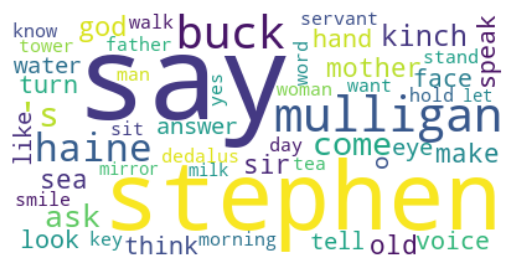

In [117]:
Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(dict)

plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
plt.show()